In [2]:
import keras,os
from keras.datasets import fashion_mnist, cifar100
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.models import Sequential
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
from keras import optimizers
from tensorflow.keras.layers import Lambda
from keras import backend as K
from sklearn import datasets # load dataset
from sklearn.model_selection import train_test_split # split dataset
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.metrics import accuracy_score # check accuracy

ModuleNotFoundError: No module named 'tensorflow'

A1

In [5]:
(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255
test_X = test_X / 255
train_X1 = train_X[0:100]
train_Y1 = train_Y[:100]
val_X = train_X[100:150]
val_Y_Onehot = to_categorical(train_Y[100:150])
train_Y_one_hot = to_categorical(train_Y1)
test_Y_one_hot = to_categorical(test_Y)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

C:\Users\abhin\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 11, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 140,682 (549.54 KB)

 Trainable params: 140,682 (549.54 KB)

 Non-trainable params: 0 (0.00 B)

A2

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 866ms/step - accuracy: 0.0771 - loss: 2.2936 - val_accuracy: 0.1600 - val_loss: 2.2932
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.2908 - loss: 2.1459 - val_accuracy: 0.1400 - val_loss: 2.2828
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 0.2144 - loss: 2.0166 - val_accuracy: 0.1400 - val_loss: 2.2024
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.2833 - loss: 1.8720 - val_accuracy: 0.3000 - val_loss: 2.0291
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.4502 - loss: 1.6822 - val_accuracy: 0.4800 - val_loss: 1.8072
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.5846 - loss: 1.4369 - val_accuracy: 0.5400 - val_loss: 1.5967
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.6402 - loss: 1.2058 - val_accuracy: 0.6200 - val_loss: 1.3525
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.7367 - loss: 1.0229 - val_accuracy: 0.6000 - v

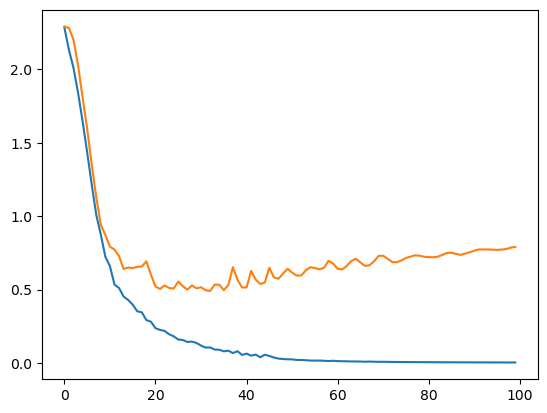

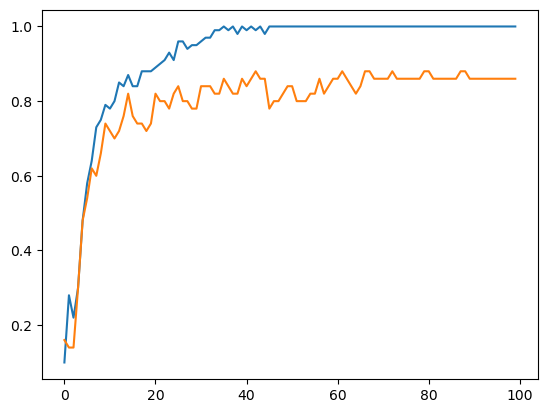

In [9]:
history = model.fit(train_X1, train_Y_one_hot, batch_size=64, epochs=100, validation_data=(val_X,val_Y_Onehot))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

A3

In [10]:
score = model.evaluate(test_X[0:100],test_Y_one_hot[0:100], verbose=1)
print('\nKeras CNN binary accuracy:', score[1],'\n')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6920 - loss: 2.1235

Keras CNN binary accuracy: 0.6700000166893005 



A4

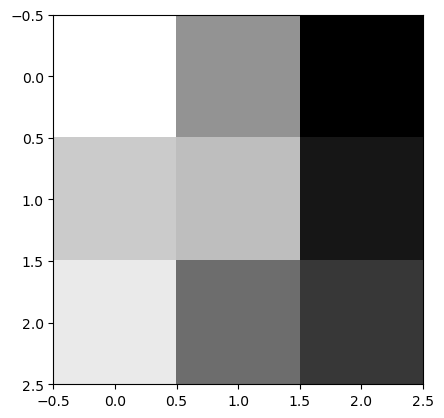

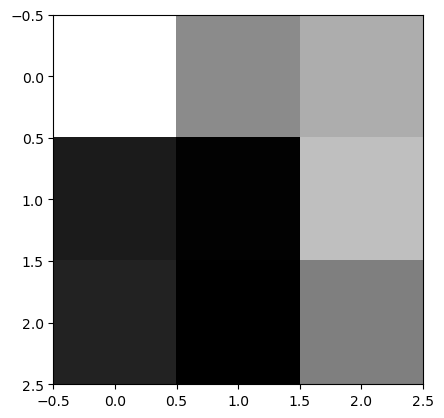

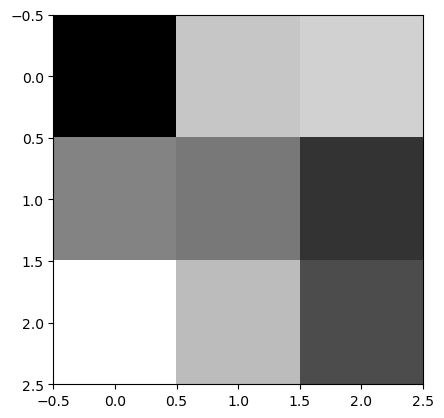

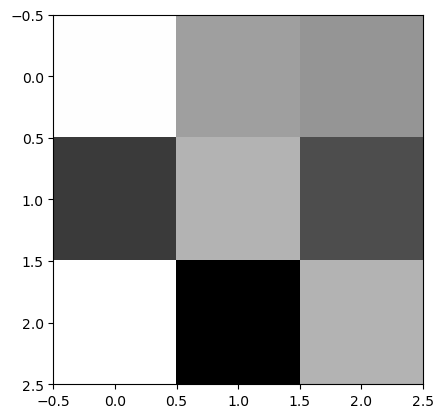

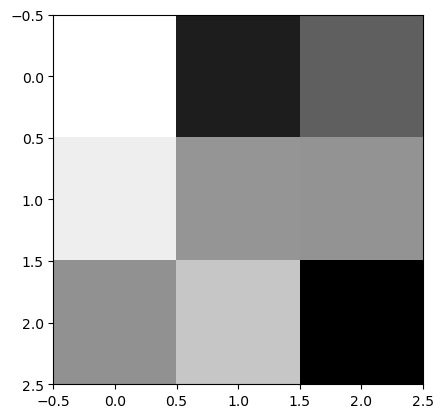

In [12]:
filters, biases = model.layers[0].get_weights()
for i in range(5):
    plt.imshow(filters[:,:,0,i], cmap='gray')
    plt.show()

A5

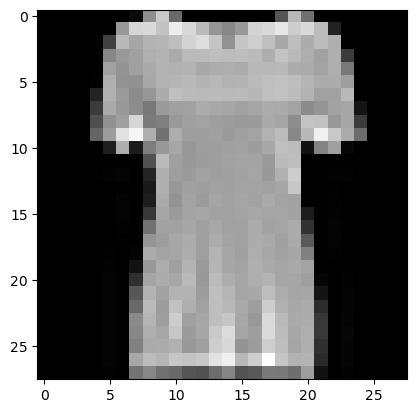

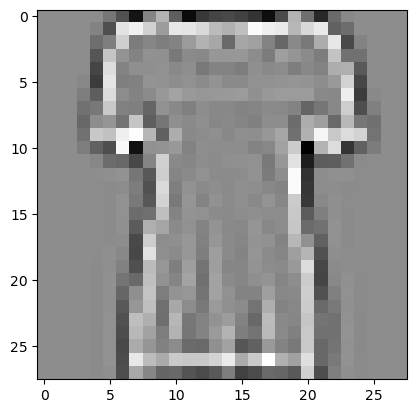

In [17]:
filt = np.array([
    [[-1, -1, -1], 
     [-1,  8, -1], 
     [-1, -1, -1]]
])

im = train_X[10]


plt.imshow(im, cmap='gray')
plt.show()


ot = signal.convolve2d(im.reshape(28, 28), filt[0], boundary='symm', mode='same')

plt.imshow(ot, cmap='gray')
plt.show()

A6

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
# Convert labels to one-hot encoding
train_Y_one_hot = to_categorical(train_Y1)
test_Y_one_hot = to_categorical(test_Y)

#  Build Fully Connected Dense Network
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Convert 28x28 image to 1D
    Dense(128, activation='relu'),  
    Dropout(0.3),  # Regularization to prevent overfitting
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')  # 10 classes (output layer)
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#  Train Model
history = model.fit(train_X1, train_Y_one_hot, 
                    validation_data=(val_X, val_Y_Onehot), 
                    epochs=50, batch_size=16, verbose=1)

C:\Users\abhin\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.2179 - loss: 2.2784 - val_accuracy: 0.3200 - val_loss: 2.0427
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4194 - loss: 1.8971 - val_accuracy: 0.4800 - val_loss: 1.7556
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.5264 - loss: 1.5305 - val_accuracy: 0.5400 - val_loss: 1.5082
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5098 - loss: 1.4482 - val_accuracy: 0.5800 - val_loss: 1.3901
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5698 - loss: 1.2850 - val_accuracy: 0.5600 - val_loss: 1.2903
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6197 - loss: 1.2696 - val_accuracy: 0.5600 - val_loss: 1.1713
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.5931 - loss: 1.2483 - val_accuracy: 0.5800 - val_loss: 1.0992
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6964 - loss: 0.9873 - val_accuracy: 0.6400 - val_loss: 1.0169

A7

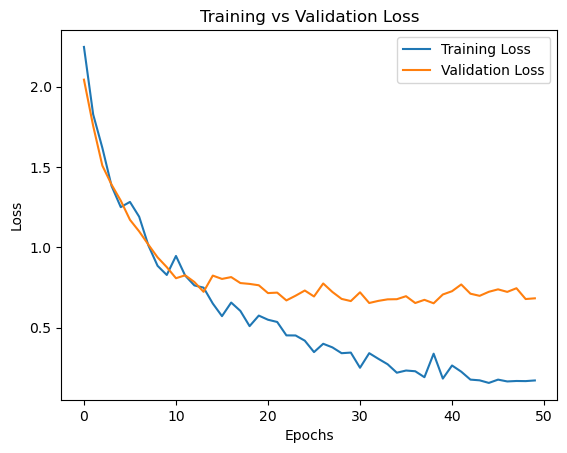

In [23]:
# Plot Training vs Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

A8

In [24]:
#Test Model on Test Set
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6952 - loss: 1.0383
Test Accuracy: 0.6928
